# Quantification of Events' Similarity:
### __Description of the Test Statistic__:
In order to improve modeling efficency and reduce redundancy, incremental excess rainfall (runoff) curves are grouped using a novel test statistic. This test statistic is a quantitative measure of the similiarity between two curves and is based on the incremental and cumulative volumentric differences between the two curves. The mathematical structure of the test statistic is based on the Kling-Gupta Efficiency described in Kling et al. (2012) and can be expressed as a follows:

<img src="http://latex.codecogs.com/svg.latex?test = 1-\sqrt{(t_c-1)^2+(t_v-1)^2}" border="0"/>

Where, 

<img src="http://latex.codecogs.com/svg.latex?t_c = \frac{convEpsilon-max⁡\%dif}{convEpsilon}" border="0"/>

and

<img src="http://latex.codecogs.com/svg.latex?t_v= \frac{volEpsilon-total⁡\%dif}{volEpsilon}" border="0"/>

For <i>t<sub>c</sub></i>, the <i>max&#37;dif</i> is the maximum percent difference in runoff between two curves at any given timestep, where the length of the timestep is set by <i>tempEpsilon</i>. This percent difference can be expressed as:

<img src="http://latex.codecogs.com/svg.latex? max\%dif =  \frac{\mid R_{1_i}-R_{2_i}\mid}{\Big[\frac{R_{1_i}+R_{2_i}}{2}\Big]} *100" border="0"/>

Where, <i>R<sub>1<sub>i</sub></sub></i> is the runoff over timestep <i>i</i> for curve 1 and <i>R<sub>2<sub>i</sub></sub></i> is the runoff overtime step <i>i</i> for curve 2.


For <i>t<sub>v</sub></i>, the <i>total&#37;dif</i> is the percent difference in the total runoff between two curves. This percent difference can be expressed as:

<img src="http://latex.codecogs.com/svg.latex? total\%dif = \frac{T_1-T_2}{\Big[\frac{T_1+T_2}{2}\Big]} *100" border="0"/>



Where, <i>T<sub>1</sub></i> is the total runoff for curve 1 and <i>T<sub>2</sub></i> is the total runoff for curve 2.

### __Test Statistic Parameters__:

- __tempEpsilon__: The number of hours over which to resample the excess rainfall event time-series during the first convolution. This smooths-out high temporal frequency variability, which means more curves will be considered similiar to eachother. 

- __tempEpsilon2__: The tempEpsilon for the final (second) convolution. 

- __convEpsilon__: The maximum allowable percent difference in excess rainfall between two curves at any timestep. If <i>max&#37;dif</i> is greater than or equal to <i>convEpsilon</i> then <i>t<sub>c</sub></i> will be less than or equal to zero, resulting in a test value that is less than or equal to zero (see `Interpretation of the Test Statistic` below).

- __volEpsilon__: The maximum allowable precent difference in the total excess rainfall between two curves. If <i>total&#37;dif</i> is greater than or equal to <i>volEpsilon</i> then <i>t<sub>v</sub></i> will be less than or equal to zero, resulting in a test value that is less than or equal to zero (see `Interpretation of the Test Statistic` below).


### Visualize the test statistic parameters:

##### Load dependencies:

In [1]:
import sys
sys.path.append('core')
from hydromet import*

file = 'Augusta_P01.json'       # Filename
duration = 24                   # Duration; [hours]
BCN = 'D01'                     # Boundary condition name
root_dir = pl.Path(os.getcwd())
output_dir = root_dir/'Outputs' # Path of the file to load

with open(output_dir/file) as f:
    EventsTable = json.load(f)
dur = 'H{}'.format(str(duration).zfill(2))
events = pd.DataFrame.from_dict(EventsTable[dur]['BCName'][BCN])
events['hours'] = EventsTable[dur]['time_idx']
events = events.set_index('hours')
events.head(2)

,E2001,E2002,E2003,E2004,E2005,E2006,E2007,E2008,E2009,E2010,...,E2237,E2238,E2239,E2240,E2241,E2242,E2243,E2244,E2245,E2246
hours,,,,,,,,,,,,,,,,,,,,,
0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000
0.5,0.00028,0.000872,0.00192,0.000186,0.000026,0.004712,0.000652,0.000644,0.000202,0.000012,...,9.950520e-08,1.722946e-12,0.000003,3.043423e-09,3.684390e-07,1.185788e-08,0.00001,1.619319e-08,3.208777e-08,0.153363


##### __tempEpsilon__:
- Specify an event in order to inspect the influence of the tempEpsilon on the shape of the curve.
- Specify a list of tempEpsilons to test.
- Plot the curve for each tempEpislon (shift+enter).

0.5 hours is 1 timesteps
1 hours is 2 timesteps
2 hours is 4 timesteps
3 hours is 6 timesteps


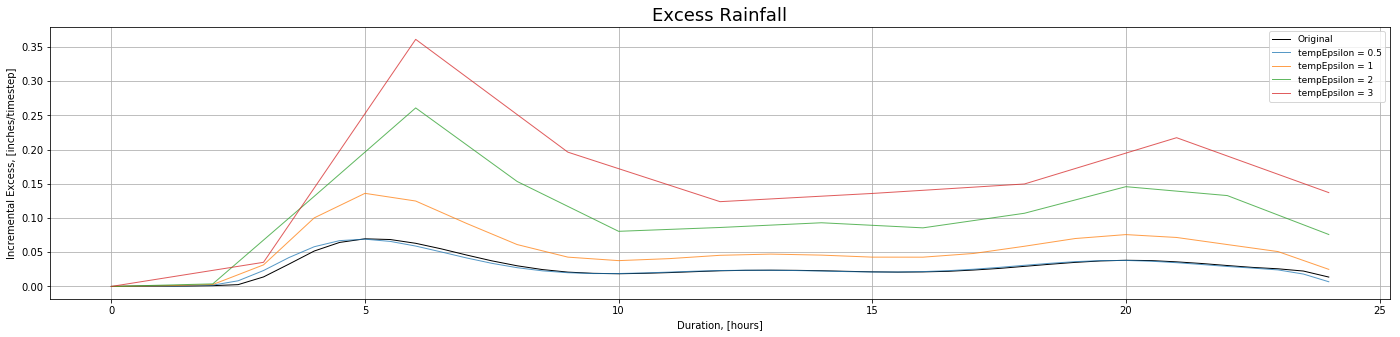

In [2]:
event_of_interest = events.columns[0]
#event_of_interest = 'E2001'

tempEpsilons = [0.5, 1, 2, 3] 

plot_tempEpsilons(events, event_of_interest, tempEpsilons, duration)

##### __convEpsilon__:
- Specify a second event that will be quantitatively compared to the event specified above.
- Specify a single tempEpsilon.
- Specify a convEpsilon to test.
- Plot the two events and calculate the percent difference at each timestep, the maximum precent difference, and the summary statistic: <i>t<sub>c</sub></i> (shift+enter). 

<i>t<sub>c</sub></i>

0.08258871661556716


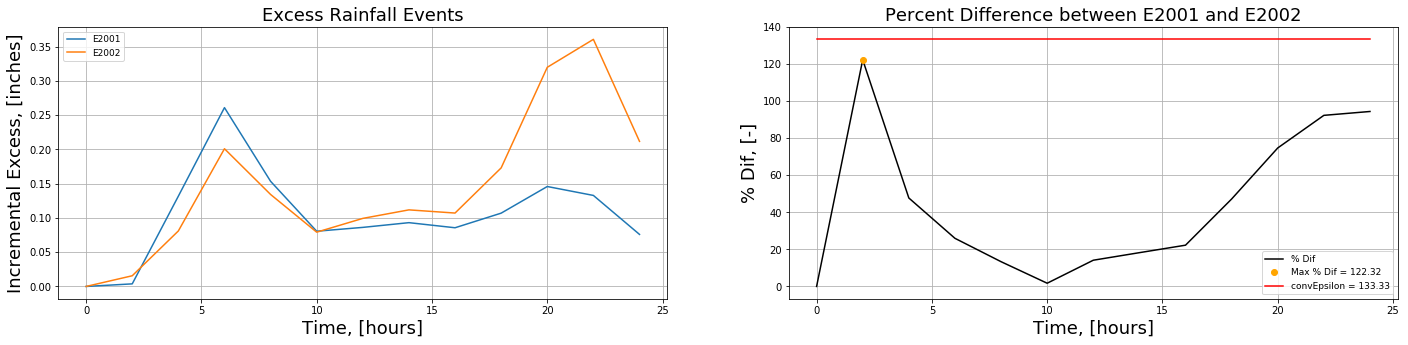

In [3]:
event_of_interest2 = events.columns[1]
#event_of_interest2 = 'E2002'

#tempEpsilon = tempEpsilons[0]
tempEpsilon = 2.0

convEpsilon = 133.33  

t_c = plot_convEpsilon(events, event_of_interest, event_of_interest2, duration, tempEpsilon, convEpsilon)

##### __volEpsilon__:
- Specify a volEpsilon to test given the tempEpsilon and convEpsilon specified above.
- Plot the cumulative excess rainfall for the two events and calculate the percent difference at each timestep, the total percent difference, and the summary statistic: <i>t<sub>v</sub></i> (shift+enter). 

<i>t<sub>v</sub></i>

0.5066738544769964


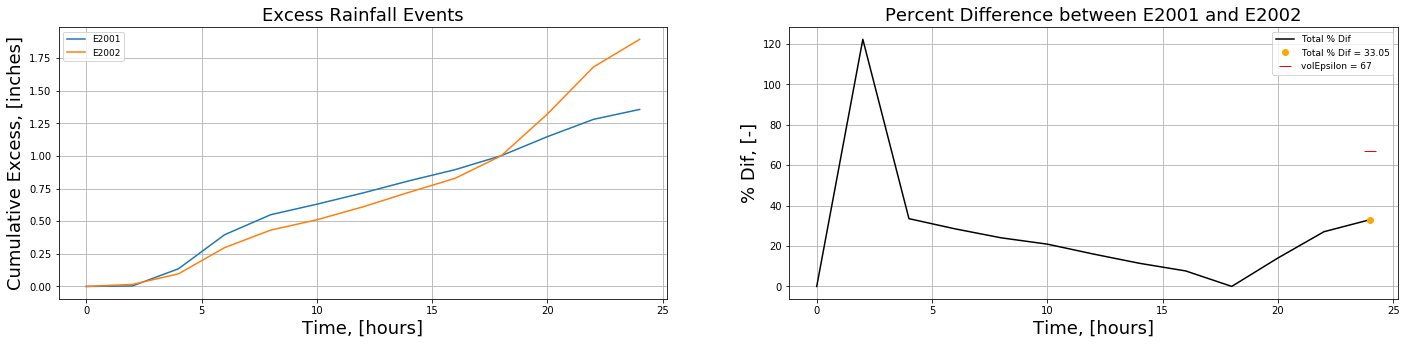

In [4]:
volEpsilon = 67  

t_v = plot_volEpsilon(events, event_of_interest, event_of_interest2, duration, tempEpsilon, volEpsilon)

##### test statistic:
- Calculate the test statistic using the <i>t<sub>c</sub></i> and <i>t<sub>v</sub></i> from above.

In [5]:
test = np.round(1 - np.sqrt((t_c-1)**2+(t_v-1)**2), 6)

print('Test statistic:', test)

Test statistic: -0.04164


#### __Interpretion of the Test Statistic__:
As described above, the test statistic is a quantitative measure of the similiarity between two excess rainfall curves, where:
- __1__ -- indicates that the resampled curves are identical to each other. Note that the curves are resampled using either <i>tempEpsilon</i> or <i>tempEpsilon2</i> depending on if the test statistic is being calculated during the first or final (second) convolution.
   - This occurs when both <i>max&#37;dif</i> and <i>total&#37;dif</i> are equal to zero, such that <i>t<sub>c</sub></i> and <i>t<sub>v</sub></i> are equal to one.
- __0__ -- indicates that the curves are not identical (being conservative). 
    - This can occur when either <i>max&#37;dif</i> or <i>total&#37;dif</i> is equal to zero, such that <i>t<sub>c</sub></i> or <i>t<sub>v</sub></i>, respectively, is equal to one, while the other <i>&#37;dif</i> is equal to the parameter value (either <i>convEpsilon</i> or <i>volEpsilon</i>) resulting in a <i>t<sub>c</sub></i> or <i>t<sub>v</sub></i> equal to zero. 
    - Note that using zero as the threshold for when two curves are no longer considered similiar is conservative since there are combinations of <i>max&#37;dif</i> and <i>total&#37;dif</i> with corresponding <i>t<sub>c</sub></i> or <i>t<sub>v</sub></i> greater than zero, which produced a combined statistic less than zero (see the lower left-hand side of the plot below).
- __1-√2__ -- indicates that the curves are not identical (by all metrics).
    - This occurs when both <i>max&#37;dif</i> and <i>total&#37;dif</i> are equal to their parameter values (<i>convEpsilon</i> and <i>volEpsilon</i>, respectively), such that <i>t<sub>c</sub></i> and <i>t<sub>v</sub></i> are both equal to zero.
    - Note that this is a non-conservative threshold for considering that two curves are quantitatively similiar since there are combinations of <i>max&#37;dif</i> and <i>total&#37;dif</i> with corresponding  <i>t<sub>c</sub></i> or <i>t<sub>v</sub></i> less than zero, which produced a combined statistic greater than this value.


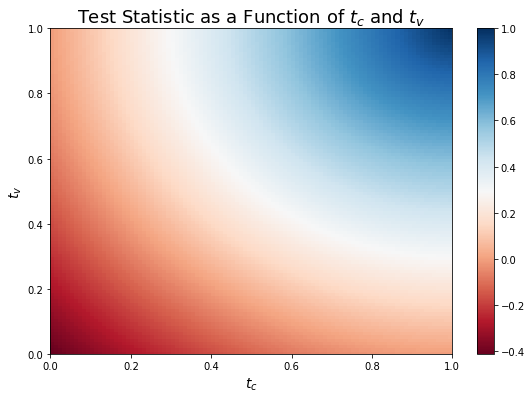

In [6]:
plot_test_statistic(delta=0.01, vmin=1-np.sqrt(2), vmax=1.0)

---

# End